In [1]:
import pandas as pd 

# how many samples do we have?
# 200

# how many features do we have?
# 5

# what are the classes 
# Yipic, Comodify, Xlenify, Abelify, Bulity

# how many classes do we have?
# 5

# how many samples of each class? are they balanced?
# Yipic       91
# Xlenify     54
# Abelify     23
# Comodify    16
# Bulity      16\
# They are NOT balanced

# read the dataset
df = pd.read_csv("MedTrial.csv")
print(df)

classes = pd.unique(df['Med'])
num_classes = len(classes)
each_class = df['Med'].value_counts()

print(classes)
print(num_classes)
print(each_class)

     Age Sex      BP Cholesterol  Na_to_K       Med
0     23   F    HIGH        HIGH   25.355     Yipic
1     47   M     LOW        HIGH   13.093  Comodify
2     47   M     LOW        HIGH   10.114  Comodify
3     28   F  NORMAL        HIGH    7.798   Xlenify
4     61   F     LOW        HIGH   18.043     Yipic
..   ...  ..     ...         ...      ...       ...
195   56   F     LOW        HIGH   11.567  Comodify
196   16   M     LOW        HIGH   12.006  Comodify
197   52   M  NORMAL        HIGH    9.894   Xlenify
198   23   M  NORMAL      NORMAL   14.020   Xlenify
199   40   F     LOW      NORMAL   11.349   Xlenify

[200 rows x 6 columns]
['Yipic' 'Comodify' 'Xlenify' 'Abelify' 'Bulity']
5
Yipic       91
Xlenify     54
Abelify     23
Comodify    16
Bulity      16
Name: Med, dtype: int64


In [2]:
print(df.info())

# what are the names of the features
# Age, Sex, BP, Cholesterol, Na_to_K

# what are the types of fetures?
# catagorial and numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Med          200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [3]:
# change categorical values of variety to numeric values

from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Med'] = labelencoder.fit_transform(df['Med']) #fitting and transforming the desired categorical column.
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['BP'] = labelencoder.fit_transform(df['BP'])
df['Cholesterol'] = labelencoder.fit_transform(df['Cholesterol'])

print(df['Med'].unique())

df

[4 2 3 0 1]


,Age,Sex,BP,Cholesterol,Na_to_K,Med
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [4]:
# are there any missing values?
# no

# if so, what are you going to do about the missing values?
# N/A

df.isna().apply(pd.value_counts)

,Age,Sex,BP,Cholesterol,Na_to_K,Med
False,200,200,200,200,200,200


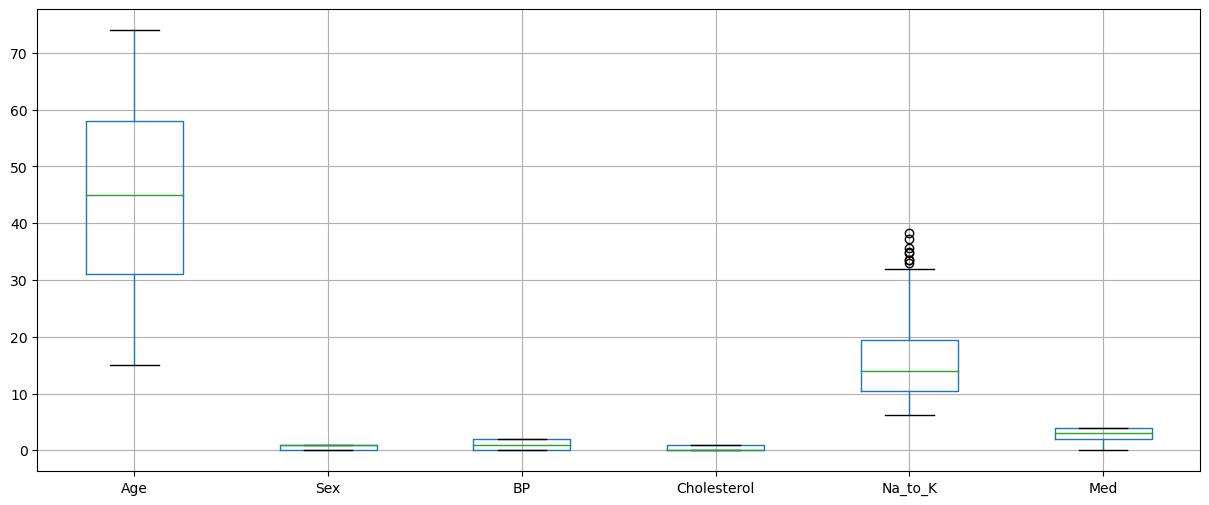

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Sex,200.0,0.520000,0.500854,0.000,0.0000,1.0000,1.00,1.000
BP,200.0,0.910000,0.821752,0.000,0.0000,1.0000,2.00,2.000
Cholesterol,200.0,0.485000,0.501029,0.000,0.0000,0.0000,1.00,1.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Med,200.0,2.870000,1.372047,0.000,2.0000,3.0000,4.00,4.000


In [5]:
from matplotlib import pyplot as plt

# are there outliers?
# yes, only in Na_to_K

# if so, what are you going to do about the outliers
# include them, they could be relevant since their higher ratios may coorelate with a different medicine

# are there anomolies in the statistics?
# no

# if so, what are you going to do about the outliers
# N/A

df.boxplot(figsize = (15,6))

#plt.savefig('plots/i0.png')
plt.show()
df.describe().T


In [11]:
# #IQR is the interquartile range

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # let's see how many outliers are in every column
# df2 = ((df < (Q1 - 1.5 * IQR)).sum()) 
# df3 = ((df > (Q3 + 1.5 * IQR)).sum())
# print(df2)
# print(df3)

# df.boxplot(figsize = (15,6))
# plt.show()

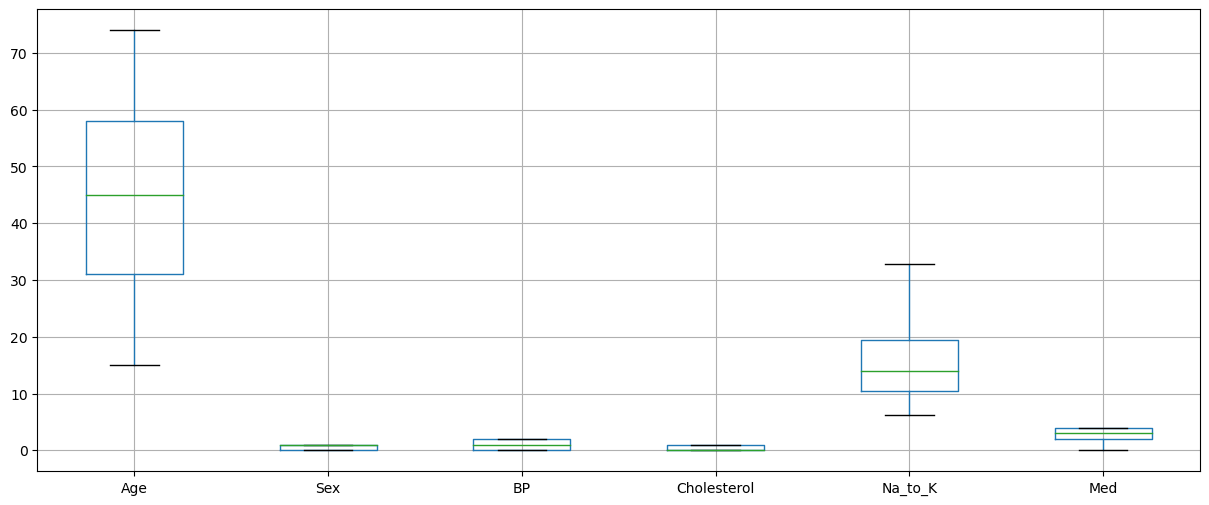

In [12]:
# We see outliers for Na_to_K. To remove them I will change all 
# the outliers to the 25th or the 75th percentile
q1 = df['Na_to_K'].quantile(0.25)
q3 = df['Na_to_K'].quantile(0.75)
iqr = q3 - q1
df.loc[(df['Na_to_K'] < (q1 - 1.5 * iqr)), 'Na_to_K'] = (q1 - 1.5 * iqr)
df.loc[(df['Na_to_K'] > (q3 + 1.5 * iqr)), 'Na_to_K'] = (q3 + 1.5 * iqr)
# make a new boxplot to check if removing them worked
df.boxplot(figsize = (15,6))
plt.show()

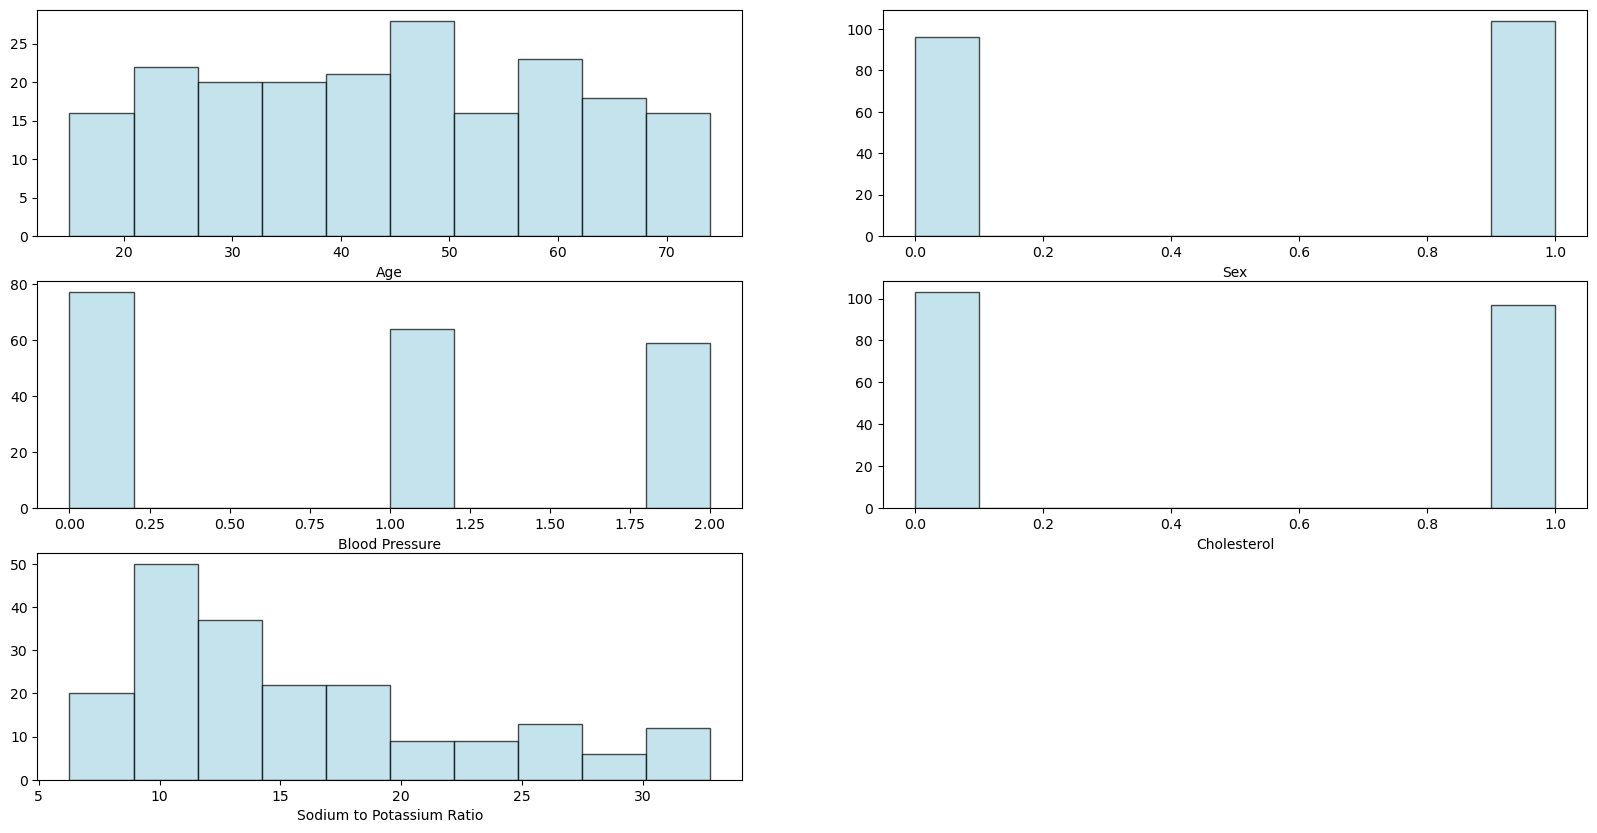

In [13]:
# what kind of distributions do the features have?

# uniform distribution
plt.figure(figsize= (20,10))
plt.subplot(3, 2, 1)
plt.hist(df['Age'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

# uniform distribution
plt.subplot(3, 2, 2)
plt.hist(df['Sex'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Sex')

# uniform distribution
plt.subplot(3, 2, 3)
plt.hist(df['BP'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Blood Pressure')

# uniform distribution
plt.subplot(3, 2, 4)
plt.hist(df['Cholesterol'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Cholesterol')

# binomial distribution
plt.subplot(3, 2, 5)
plt.hist(df['Na_to_K'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Sodium to Potassium Ratio')

#plt.savefig('plots/i1.png')
plt.show()

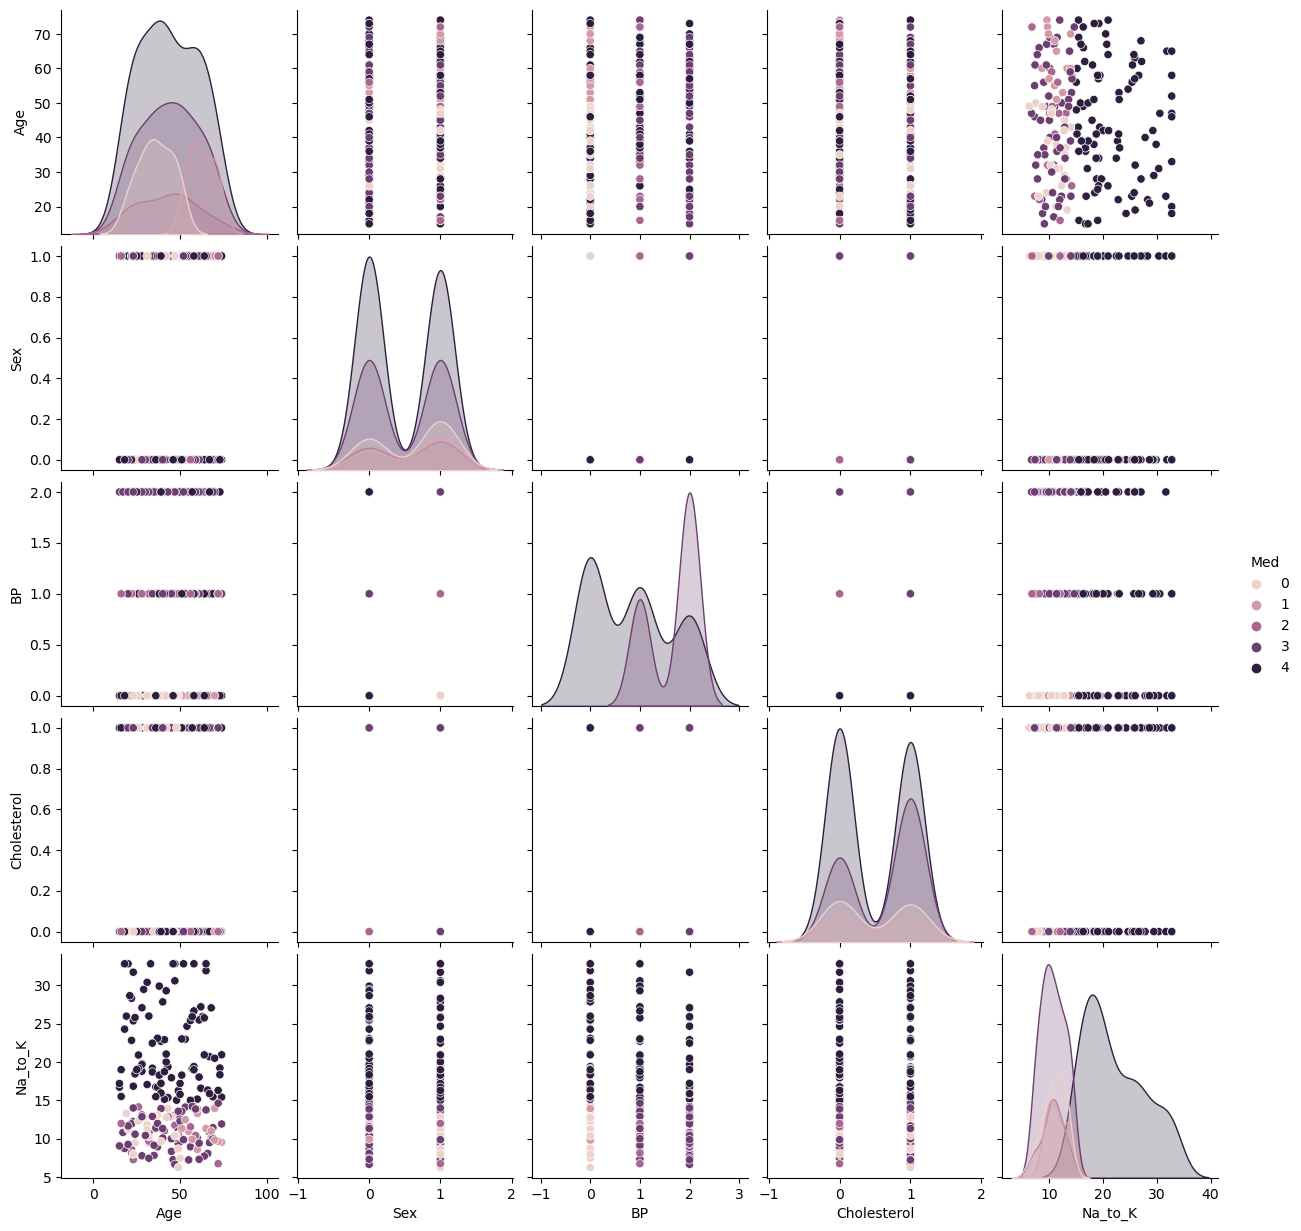

In [14]:
import seaborn as sns

# what kind of correlation does the data exhibit?
# The largest cooralative factors are clearly blood preassure and Na_to_K ratio. Med 4 is likeley perscribed if the Na_to_K ratio is high
# and med 3 is most likely perscribed if BP is high.

sns.pairplot(df, hue='Med')  #pairplot
#plt.savefig('plots/pairplot.png')
plt.show()

In [15]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Med
Age,1.000000,0.102027,0.054212,-0.068234,-0.062419,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.124141,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.145978,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.014624,0.055629
Na_to_K,-0.062419,-0.124141,-0.145978,0.014624,1.000000,0.598628
Med,-0.004828,-0.098573,0.372868,0.055629,0.598628,1.000000


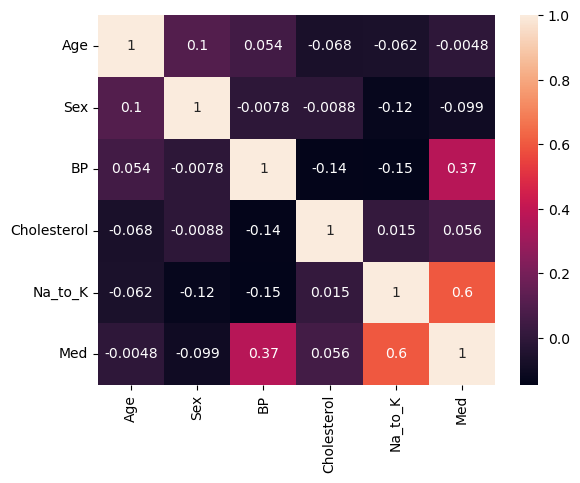

In [16]:
sns.heatmap(df.corr(), annot=True)
plt.show()